IMPORT PACCHETTI NECESSARI

In [2]:
from ultralytics import YOLO
import os
from PIL import Image

In [3]:
#setto working directory
os.chdir(r"C:\Users\cappe\Desktop\OBJECT_DETECTION")

IMPORT MODELLO YOLOv11 NANO E SMALL PER TEST

In [4]:
model_n = YOLO("./models/yolo11n.pt")
model_s = YOLO("./models/yolo11s.pt")

In [ ]:
print('CLASSI SUPPORTATE:')
model_n.names.values()

CLASSI SUPPORTATE:


dict_values(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'])

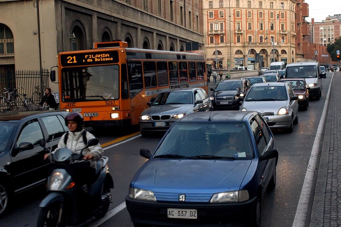

In [ ]:
im1 = Image.open("./immagini_test/Bologna.jpg")
new_size = (im1.width // 3, im1.height // 3)
img_resized = im1.resize(new_size)
img_resized


0: 448x640 3 persons, 1 bicycle, 13 cars, 1 motorcycle, 1 bus, 1 truck, 1 traffic light, 39.6ms
Speed: 9.4ms preprocess, 39.6ms inference, 12.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to c:\Users\cappe\Desktop\OBJECT_DETECTION\runs\detect\predict4


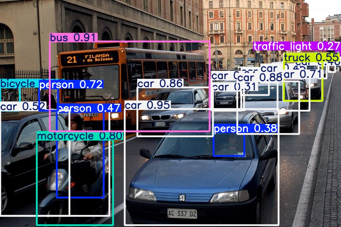

In [ ]:
results = model_n.predict(source=im1, name='predict', save=True)
im1 = Image.open(f"{results[0].save_dir}\\Bologna.jpg")
new_size = (im1.width // 3, im1.height // 3)
img_resized = im1.resize(new_size)
img_resized

Durante il training viene applicata una pipeline per la Data augmentation.
Nello specifico vengono applicate le seguenti trasformazioni:
*   hue
*   saturation
*   brightness
*   Translates the image
*   Scales the image
*   Flips the image  
*   Mosaic (Combines four training images into one, simulating different scene compositions and object interactions. Highly effective for complex scene understanding.)
*   Randomly erases a portion of the image during classification training, encouraging the model to focus on less obvious features for recognition
*   Crops the classification image to a fraction of its size to emphasize central features and adapt to object scales, reducing background distractions



In [5]:
#parametri
epoche=100
lr=0.001
str_lr = str(lr).split('.')[1]
b_s=16
str_batch=str(b_s)
opt='Adam'
freezed=10
str_freeze=str(freezed)

#modello di partenza
model_n = YOLO("./models/yolo11n.pt")
dataset_yaml=os.path.join(os.getcwd(),"license_plate\\data.yaml")
#training
results = model_n.train(data=dataset_yaml,
                        epochs=epoche,
                        imgsz=640,
                        exist_ok=True,
                        name=f'train_freezed_first_{str_freeze}_{opt}_LR{str_lr}_BATCH{str_batch}_cls01',
                        optimizer=opt,
                        seed=0,
                        freeze=freezed,
                        lr0=lr,
                        weight_decay=0.0005,
                        batch=b_s, 
                        cls=0.01, #Weight of the classification loss in the total loss function, affecting the importance of correct class prediction relative to other components.
                        patience=(epoche*10)//100  #circa il 10% delle epoche
                        )

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.85  Python-3.11.11 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
engine\trainer: task=detect, mode=train, model=./models/yolo11n.pt, data=C:\Users\cappe\Desktop\OBJECT_DETECTION\license_plate\data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train_freezed_first_10_Adam_LR001_BATCH16_cls01, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augme

train: Scanning C:\Users\cappe\Desktop\OBJECT_DETECTION\license_plate\train\labels.cache... 7057 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7057/7057 [00:00<?, ?it/s]
val: Scanning C:\Users\cappe\Desktop\OBJECT_DETECTION\license_plate\valid\labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<?, ?it/s]


Plotting labels to c:\Users\cappe\Desktop\OBJECT_DETECTION\runs\detect\train_freezed_first_10_Adam_LR001_BATCH16_cls01\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\Users\cappe\Desktop\OBJECT_DETECTION\runs\detect\train_freezed_first_10_Adam_LR001_BATCH16_cls01
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.02G      1.265    0.02334      1.147          2        640: 100%|██████████| 442/442 [02:20<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:26<00:00,  2.45it/s]

                   all       2048       2195      0.912      0.814      0.881      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.04G      1.232    0.01718      1.116          1        640: 100%|██████████| 442/442 [01:57<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 2/64 [00:06<03:19,  3.22s/it]


RuntimeError: DataLoader worker (pid(s) 19440) exited unexpectedly

TEST

In [ ]:
# Load a model
best_model = YOLO(os.path.join(os.getcwd(),"runs\\detect\\train_freezed_backbone_ADAM001_BATCH16\\weights\\best.pt"))
testset_yaml=os.path.join(os.getcwd(),"license_plate\\data_test.yaml")
# Customize validation settings
test_results = best_model.val(data=testset_yaml, imgsz=640, batch=16, device="0", name='test', exist_ok=True)

Ultralytics 8.3.85  Python-3.11.11 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\cappe\Desktop\OBJECT_DETECTION\license_plate\test\labels.cache... 1020 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1020/1020 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.84it/s]


                   all       1020       1085      0.982      0.939      0.973      0.716
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Saving c:\Users\cappe\Desktop\OBJECT_DETECTION\runs\detect\test\predictions.json...
Results saved to c:\Users\cappe\Desktop\OBJECT_DETECTION\runs\detect\test


In [32]:
print("RISULTATI TEST SET")
print('mAP50-95:',test_results.box.map)
print('mAP50:',test_results.box.map50)  
print('mAP75:',test_results.box.map75)  
print("Recall:",test_results.box.r[0])
print("Precision:",test_results.box.p[0])

RISULTATI TEST SET
mAP50-95: 0.715600440559924
mAP50: 0.9730620030359339
mAP75: 0.8643365790853135
Recall: 0.9391705069124424
Precision: 0.981815531284952
